In [60]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=45fd5bd4399cccc0784a611f6e56510a6e14069c0184ddea41315e8ed4347763
  Stored in directory: /home/vadim/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [52]:
import sys
sys.path.append('/home/vadim/pythonw/')

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn import tree


import libs.my_plots as myp

plt.style.use('seaborn')
%matplotlib inline

NameError: name 'sklearn' is not defined

In [17]:
pwd()

'/home/vadim/pythonw/ml5-validation'

In [3]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
print(df.shape)

(12330, 18)


In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
ddf = pd.get_dummies(df)
ddf.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


False    84.525547
True     15.474453
Name: Revenue, dtype: float64


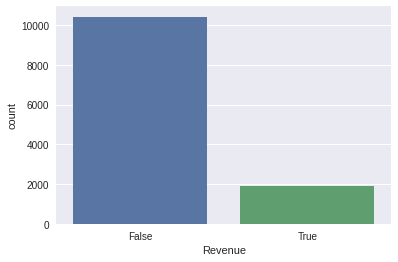

In [7]:
sns.countplot(data=ddf, x='Revenue')
class_percent = ddf['Revenue'].value_counts(normalize=True)*100
print(class_percent)

In [8]:
X, y = ddf.drop('Revenue', axis=1), ddf['Revenue']

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape[0])
print(X_test.shape[0])

9864
2466


In [13]:
model = ensemble.RandomForestClassifier(
    random_state=42
)
skf = model_selection.StratifiedKFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring='f1',
    return_train_score=True
)


In [16]:
display(cv_metrics)

print('Test score: ', round(np.mean(cv_metrics['test_score']), 2))
print('Train score: ', round(np.mean(cv_metrics['train_score']), 2))

{'fit_time': array([0.93570256, 0.77481699, 0.75322199, 0.85618043, 0.78316498]),
 'score_time': array([0.05914879, 0.06679988, 0.03476548, 0.03869605, 0.03816652]),
 'test_score': array([0.62835249, 0.64772727, 0.67669173, 0.60582524, 0.62698413]),
 'train_score': array([1.        , 1.        , 1.        , 1.        , 0.99958246])}

Test score:  0.64
Train score:  1.0


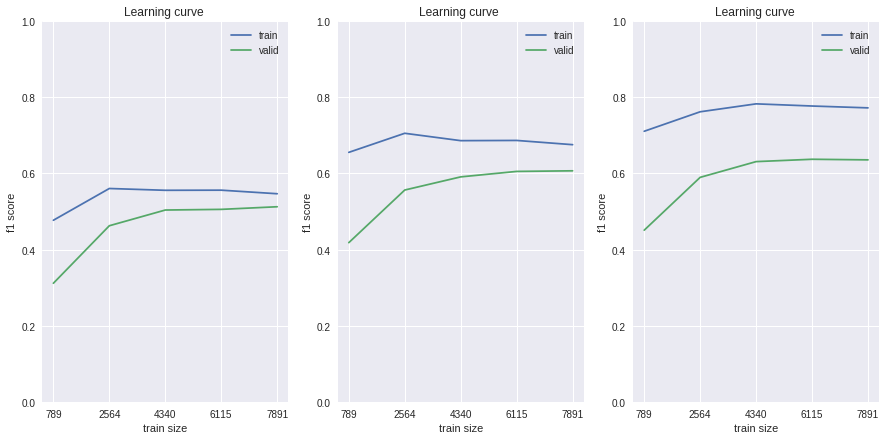

In [56]:
models = [
    ensemble.RandomForestClassifier(
        random_state=42,
        max_depth=5,
        n_estimators=200,
        min_samples_leaf=5
    ),
    ensemble.RandomForestClassifier(
        random_state=42,
        max_depth=7,
        n_estimators=200,
        min_samples_leaf=5
    ),
    ensemble.RandomForestClassifier(
        random_state=42,
        max_depth=12,
        n_estimators=200,
        min_samples_leaf=5
    )
]

fig, ax = plt.subplots(1, 3, figsize=(15, 7))

for i, model in enumerate(models):
    myp.plot_learning_curve(model, X_train, y_train, skf, ax=ax[i])


In [61]:
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      8367
        True       0.86      0.55      0.67      1497

    accuracy                           0.92      9864
   macro avg       0.89      0.77      0.81      9864
weighted avg       0.92      0.92      0.91      9864

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2055
        True       0.81      0.45      0.58       411

    accuracy                           0.89      2466
   macro avg       0.85      0.72      0.76      2466
weighted avg       0.88      0.89      0.88      2466



In [64]:
model = ensemble.RandomForestClassifier(
    max_depth=7,
    min_samples_leaf=5,
    random_state=42,
    n_estimators=200
)

skf = model_selection.StratifiedKFold(n_splits=5)

myp.plot_pr_find_value(model, X_train,y_train, skf)

AttributeError: module 'libs.my_plots' has no attribute 'plot_pr_find_value'